## Indian startup visualization

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd



## Check the trend of investments over the years. 

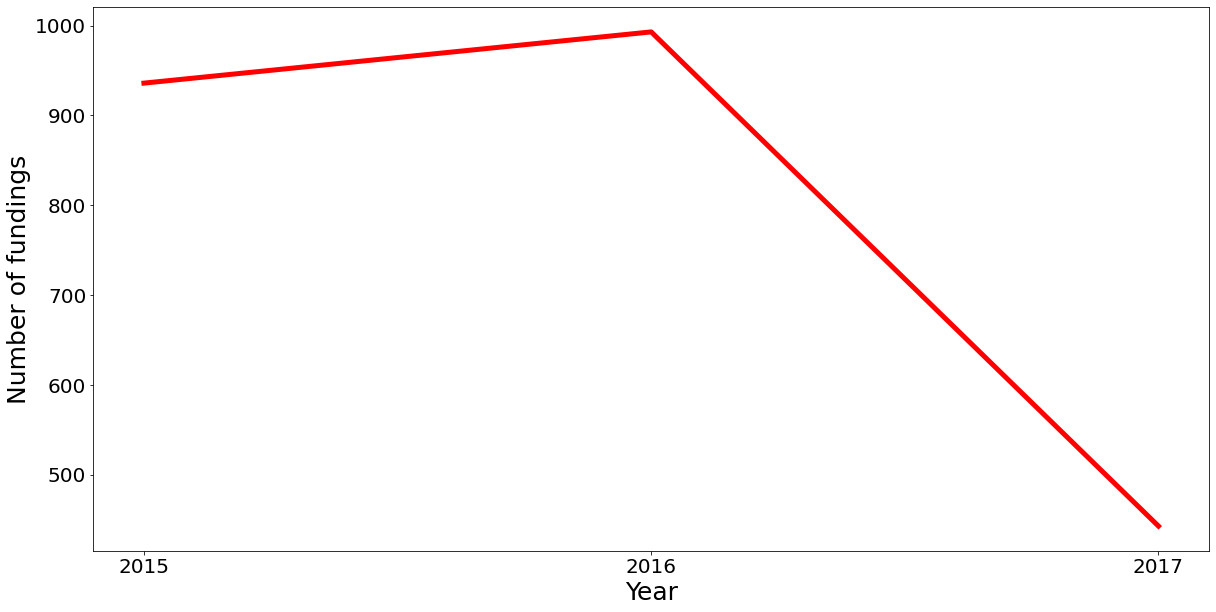

2015 936
2016 993
2017 443


In [22]:
# To analyze change over the year we will go through the total funding over the year which will give us the information regarding
# the number of funding over the year.
with open('startup_funding.csv', encoding='utf8') as file_obj:
    data=csv.DictReader(file_obj, skipinitialspace=True)
    year=[]
    for row in data:
        year.append(row['Date'][len(row['Date'])-4:])
    np_year=np.array(year,dtype=int)  # to get the numpy array of total year data.
    dict_={}  # creat an empty array with key as year and value as the frequency.
    for i in np_year:
        dict_[i]=dict_.get(i,0)+1
    xaxis=[]
    yaxis=[]
    for i in dict_.keys():
        xaxis.append(i)
        yaxis.append(dict_[i])
    xaxis=xaxis[::-1]   # get the data in assending order of year.
    yaxis=yaxis[::-1]
    plt.subplots(figsize=(20, 10))
    plt.plot(xaxis, yaxis, color='red', linewidth=5)
    plt.xticks(xaxis)
    plt.xlabel('Year', size=25)
    plt.ylabel('Number of fundings', size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    for i in range(len(xaxis)):
        print(xaxis[i], yaxis[i])
    #print(xaxis)
    #print(yaxis)
    #print(dict_)

## Which type of companies got more easily funding.

In [24]:
df=pd.read_csv(r'startup_funding.csv', encoding='utf8')
df.head(10)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


C:\Users\jiten\AppData\Local\Temp\ipykernel_51500\3537742215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'


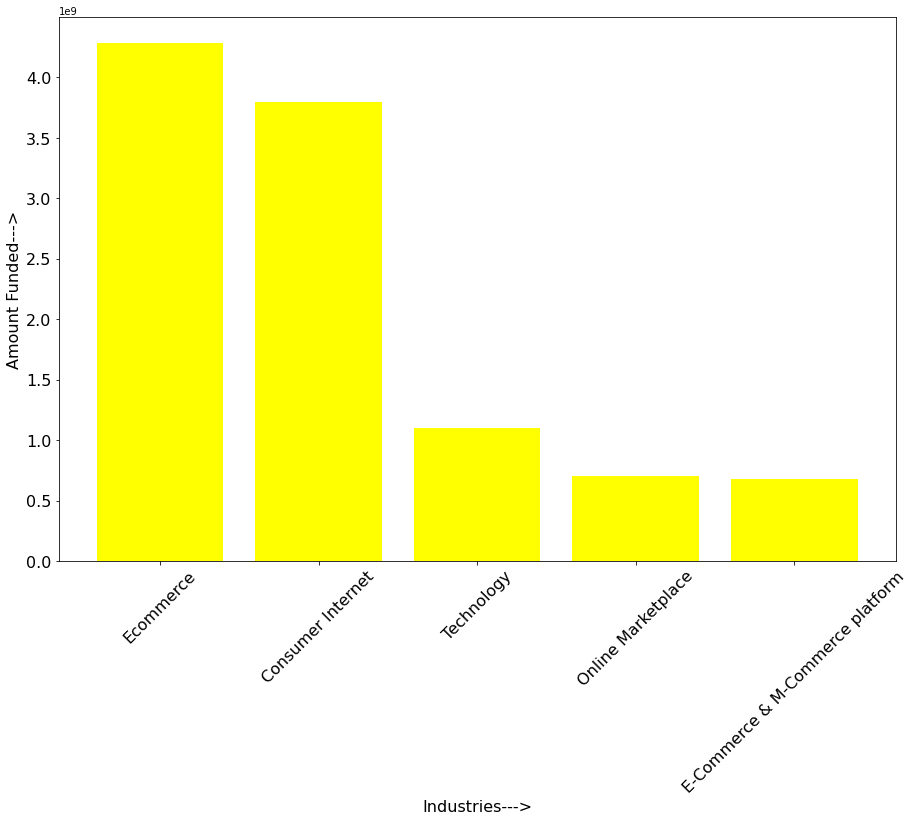

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('startup_funding.csv')
df=data.copy()
df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'
df.drop(df['SNo'].loc[df.IndustryVertical.isnull()], inplace=True)

np_industry=np.array(df.IndustryVertical)
np_amount=np.array(df.AmountInUSD)
np_industry[np_industry=='eCommerce']='Ecommerce'
np_industry[np_industry=='ECommerce']='Ecommerce'
np_industry[np_industry=='ecommerce']='Ecommerce'

for i in range(len(np_amount)):
    np_amount[i]=''.join(np_amount[i].split(','))
np_amount=np.array(np_amount, dtype='int64')
dic=dict()
for i in range(len(np_amount)):
    if np_industry[i] in dic.keys():
        dic[np_industry[i]]+=np_amount[i]
    else:
        dic[np_industry[i]]=np_amount[i]
xaxis=[]
yaxis=[]

for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-5:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-5:-1]

plt.subplots(figsize=(15, 10))
plt.bar(np_xaxis, np_yaxis, color='yellow')
plt.xticks(rotation=45, size=16)
plt.xlabel('Industries--->', size=16)
plt.ylabel('Amount Funded--->', size=16)
plt.yticks(size=16)
plt.show()

for i in range(len(np_xaxis)):
    print(np_xaxis[i], format((np_yaxis[i]*100)/sum(np_yaxis) , '.2f'))


## Find out which cities are generally chosen for starting a startup.

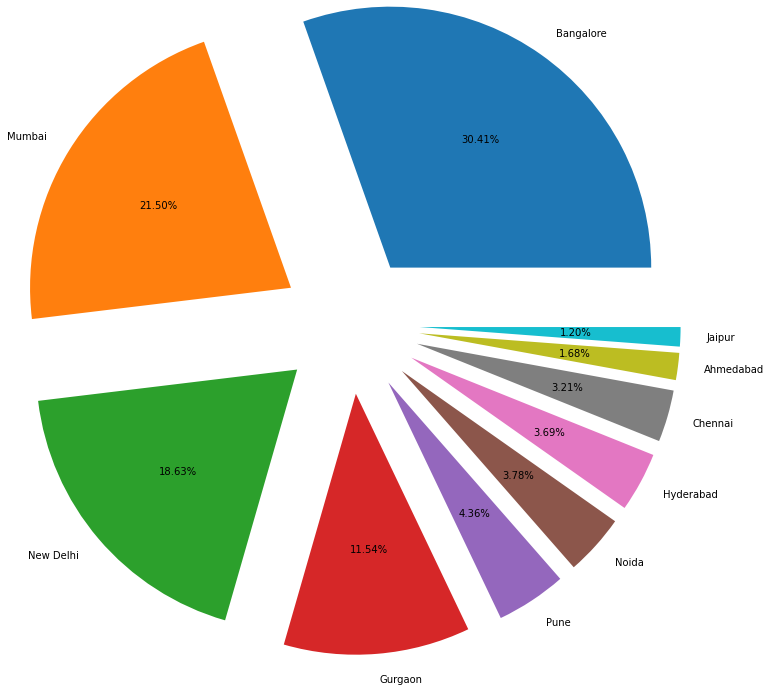

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
with open('startup_funding.csv', encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    city=[]
    for row in file_data:
        city.append(row['CityLocation'])
    np_city=np.array(city)
    np_city=np_city[np_city != '']
    
    for i in range(len(np_city)):
        if 'bangalore' in np_city[i]:
            np_city[i]='Bangalore'
        if np_city[i]=='Delhi':
            np_city[i]='New Delhi'
    
    for i in range(len(np_city)) :
        np_city[i]=np_city[i].split('/')[0].strip()
    
    dic=dict()
    for i in np_city:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    
    xaxis=[]
    yaxis=[]
    for i in dic.keys():
        xaxis.append(i)
        yaxis.append(dic[i])
    np_xaxis=np.array(xaxis)
    np_yaxis=np.array(yaxis)
    
    np_xaxis=np_xaxis[np.argsort(np_yaxis)]
    np_yaxis=np.sort(np_yaxis)
    
    np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-10:-1]
    np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-10:-1]

    plt.pie(np_yaxis, labels=np_xaxis, autopct='%.2f%%', radius=3, explode=[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8])
    plt.show()
    
    for i in range(len(np_xaxis)):
        print(np_xaxis[i], np_yaxis[i])

# There are 4 different type of investments in the given data.I tried to  Find out percentage of amount funded for each investment type and represented by scatter chart.

C:\Users\jiten\AppData\Local\Temp\ipykernel_51500\3713969032.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.InvestmentType.loc[df.InvestmentType=='Crowd funding']='Crowd Funding'
C:\Users\jiten\AppData\Local\Temp\ipykernel_51500\3713969032.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.InvestmentType.loc[df.InvestmentType=='PrivateEquity']='Private Equity'
C:\Users\jiten\AppData\Local\Temp\ipykernel_51500\3713969032.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

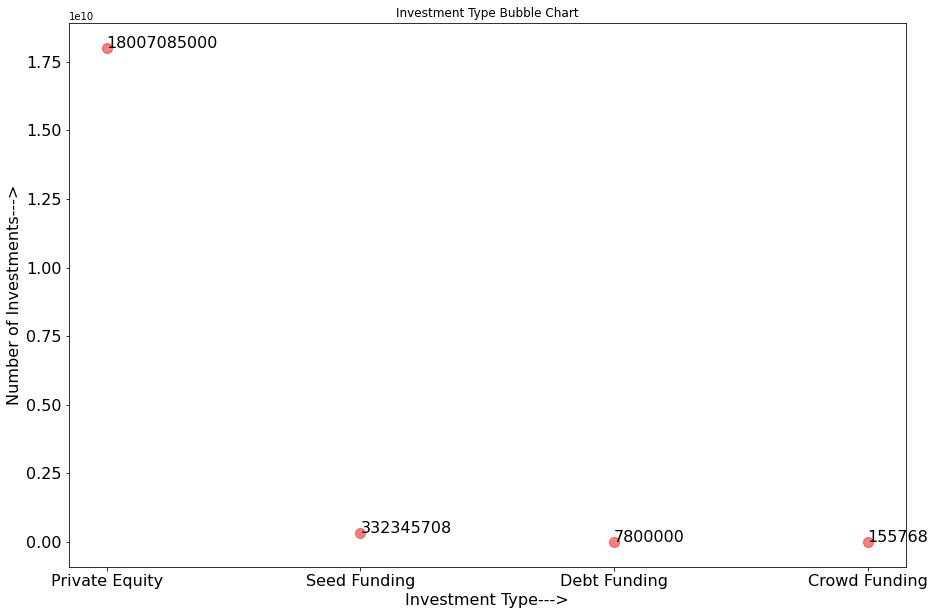

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
original_data=pd.read_csv('startup_funding.csv', encoding='utf8')
df=original_data.copy()
df.AmountInUSD.fillna('0', inplace=True)
df.InvestmentType.loc[df.InvestmentType=='Crowd funding']='Crowd Funding'
df.InvestmentType.loc[df.InvestmentType=='PrivateEquity']='Private Equity'
df.InvestmentType.loc[df.InvestmentType=='SeedFunding']='Seed Funding'
np_seed_funding=np.array(df.AmountInUSD[df.InvestmentType=='Seed Funding'])
for i in range(len(np_seed_funding)):
    np_seed_funding[i]=''.join(np_seed_funding[i].split(','))
np_seed_funding=np.array(np_seed_funding, dtype='int64')


np_Crowd_Funding=np.array(df.AmountInUSD[df.InvestmentType=='Crowd Funding'])
for i in range(len(np_Crowd_Funding)):
    np_Crowd_Funding[i]=''.join(np_Crowd_Funding[i].split(','))
np_Crowd_Funding=np.array(np_Crowd_Funding, dtype='int64')

np_Debt_Funding=np.array(df.AmountInUSD[df.InvestmentType=='Debt Funding'])
for i in range(len(np_Debt_Funding)):
    np_Debt_Funding[i]=''.join(np_Debt_Funding[i].split(','))
np_Debt_Funding=np.array(np_Debt_Funding, dtype='int64')


np_Private_Equity=np.array(df.AmountInUSD[df.InvestmentType=='Private Equity'])
for i in range(len(np_Private_Equity)):
    np_Private_Equity[i]=''.join(np_Private_Equity[i].split(','))
np_Private_Equity=np.array(np_Private_Equity, dtype='int64')

private=sum(np_Private_Equity)
crowd=sum(np_Crowd_Funding)
debt=sum(np_Debt_Funding)
seed=sum(np_seed_funding)
xaxis=['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding']
yaxis=[private, seed, debt, crowd]

plt.subplots(figsize=(15, 10))
plt.scatter(xaxis, yaxis, s=100, color='red', alpha=0.5)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel('Investment Type--->', size=16)
plt.ylabel('Number of Investments--->', size=16)
plt.title('Investment Type Bubble Chart')
for i in range(len(xaxis)):
    plt.text(xaxis[i], yaxis[i], yaxis[i], size=16)
plt.show()
for i in range(len(xaxis)):
    print(xaxis[i],format((yaxis[i]*100)/sum(yaxis), '.2f'))

## In startup, multiple investors might have invested. So by consider each investor for that startup. Ignore the undisclosed investors i just tried to print the top investor to get idea about the top investor.

In [4]:
import numpy as np
import pandas as pd
import csv 
with open('startup_funding.csv', encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    investors=[]
    for row in file_data:
        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            for i in row['InvestorsName'].split(','):
                investors.append(i.strip())
    dic=dict()
    for i in investors:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    x=[]
    y=[]
    for i in dic.keys():
        x.append(i)
        y.append(dic[i])
    np_x=np.array(x)
    np_y=np.array(y)
    np_x=np_x[np.argsort(np_y)]
    np_y=np.sort(np_y)
    
    np_y=np_y[::-1]
    np_x=np_x[::-1]
    print(np_x[0], np_y[0])

Sequoia Capital 64


## Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('startup_funding.csv')
df=data.copy()
df.drop(df.index[df.CityLocation.isnull()], inplace=True)
df.reset_index(inplace=True, drop=True)
df.loc[df['AmountInUSD'].isnull(), 'AmountInUSD']='0'
df.loc[df.CityLocation=='bangalore','CityLocation']='Bangalore'
df.loc[df.CityLocation=='Delhi', 'CityLocation']='New Delhi'
city=[]
amount=[]
for i in df.CityLocation:
    city.append(i)
for i in df.AmountInUSD:
    amount.append(i)

for i in range(len(amount)):
    amount[i]=''.join(amount[i].split(','))
    city[i]=city[i].split('/')[0].strip()
np_amount=np.array(amount, dtype='int64')
np_city=np.array(city)

## Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.

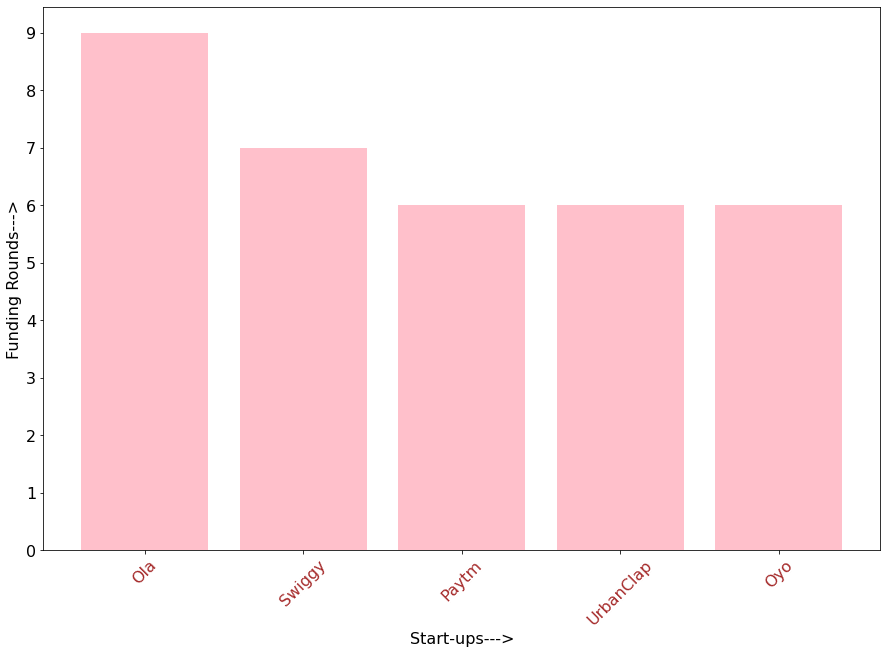

Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('startup_funding.csv')
df=data.copy()
np_startup=np.array(df.StartupName)

for i in range(len(np_startup)):
    if 'Ola' in np_startup[i]:
        np_startup[i]='Ola'
    if 'Flipkart' in np_startup[i]:
        np_startup[i]='Flipkart'
    if 'Oyo' in np_startup[i] or 'OYO Rooms' in np_startup[i]:
        np_startup[i]='Oyo'
    if 'Paytm' in np_startup[i]:
        np_startup[i]='Paytm'

dic=dict()
for i in np_startup:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
x=[]
y=[]
for i in dic.keys():
    x.append(i)
    y.append(dic[i])
np_x=np.array(x)
np_y=np.array(y)
np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)
np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]
plt.subplots(figsize=(15, 10))
plt.bar(np_x, np_y, color='pink')
plt.xticks(size=16, rotation=45, color='brown')
plt.yticks(np.arange(0, 10), size=16)
plt.xlabel('Start-ups--->', size=16)
plt.ylabel('Funding Rounds--->', size=16)
plt.show()
for i in range(len(np_x)):
    print(np_x[i], np_y[i])